In [82]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sklm
import pandas as pd
import geopandas as gpd
import csv
from sklearn import metrics

In [22]:
data_filename = 'London/result/LP.csv'
LP = np.genfromtxt(data_filename,delimiter = ',')
data_filename = 'London/result/LH.csv'
LH = np.genfromtxt(data_filename,delimiter = ',')
data_filename = 'London/result/LS.csv'
LS = np.genfromtxt(data_filename,delimiter = ',')

In [23]:
x_select=0
y_select=1

x_min, x_max = 0, np.max(LP[:,x_select])
y_min, y_max = 0, np.max(LP[:,y_select])

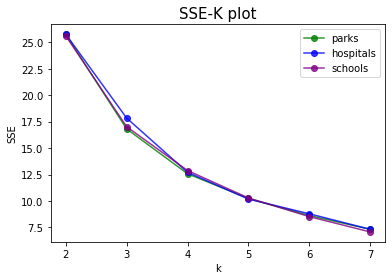

In [92]:
SSE1 = []
SSE2 = []
SSE3 = []
for k in range(2, 8):
    model1 = KMeans(n_clusters=k).fit(LP)
    SSE1.append(model1.inertia_)
    model2 = KMeans(n_clusters=k).fit(LH)
    SSE2.append(model2.inertia_)
    model3 = KMeans(n_clusters=k).fit(LS)
    SSE3.append(model3.inertia_)
X = range(2, 8)

fig_title = 'SSE-K plot'
plt.title(fig_title,fontsize=15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE1, 'o-',color="Green",alpha=0.8,label="parks")
plt.plot(X, SSE2, 'o-',color="Blue",alpha=0.8,label="hospitals")
plt.plot(X, SSE3, 'o-',color="Purple",alpha=0.8,label="schools")
plt.legend()

In [56]:
num_clusters=4
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(LP)
clustering_ids_kmeans = kmeans_output.labels_
complete_data_with_clusters = np.hstack((LP,np.array([clustering_ids_kmeans]).T))
datasave = pd.DataFrame(complete_data_with_clusters)
datasave.to_csv('London/result/LP_result.csv')

In [84]:
num_clusters=4
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(LH)
clustering_ids_kmeans = kmeans_output.labels_
complete_data_with_clusters = np.hstack((LH,np.array([clustering_ids_kmeans]).T))
datasave = pd.DataFrame(complete_data_with_clusters)
datasave.to_csv('London/result/LH_result.csv')

In [76]:
num_clusters=4
kmeans_output = KMeans(n_clusters=num_clusters, n_init=1).fit(LS)
clustering_ids_kmeans = kmeans_output.labels_
complete_data_with_clusters = np.hstack((LS,np.array([clustering_ids_kmeans]).T))
datasave = pd.DataFrame(complete_data_with_clusters)
datasave.to_csv('London/result/LS_result.csv')

Text(0.5, 1.0, 'London green space accessibility satisfaction')

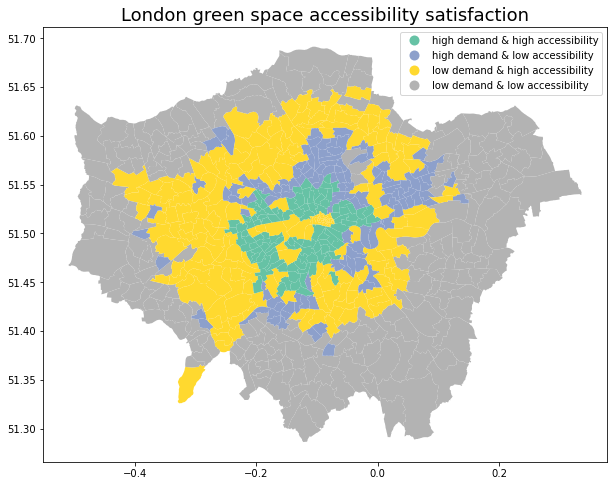

In [93]:
datafin = pd.read_csv('London/result/LP_result.csv')
gdf = gpd.read_file(f"zip://statistical-gis-boundaries-london.zip!statistical-gis-boundaries-london/ESRI/London_Ward.shp").to_crs("EPSG:4236")
plotkmeans = pd.merge(gdf, datafin ,left_on='GSS_CODE', right_on='GSS_CODE', how='inner').reset_index()
plotkmeans.plot(column='group', cmap="Set2",categorical=True, legend=True, figsize=(12,8))
plt.title("London green space accessibility satisfaction",fontsize=18)

Text(0.5, 1.0, 'London health care accessibility satisfaction')

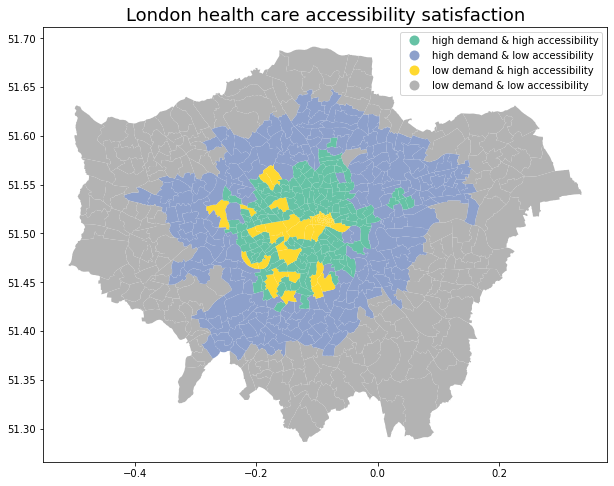

In [94]:
datafin = pd.read_csv('London/result/LH_result.csv')
gdf = gpd.read_file(f"zip://statistical-gis-boundaries-london.zip!statistical-gis-boundaries-london/ESRI/London_Ward.shp").to_crs("EPSG:4236")
plotkmeans = pd.merge(gdf, datafin ,left_on='GSS_CODE', right_on='GSS_CODE', how='inner').reset_index()
plotkmeans.plot(column='group', cmap="Set2",categorical=True, legend=True, figsize=(12,8))
plt.title("London health care accessibility satisfaction",fontsize=18)

Text(0.5, 1.0, 'London education resources accessibility satisfaction')

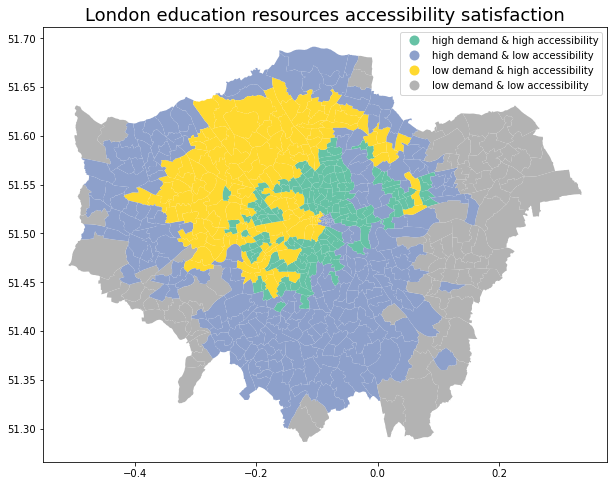

In [95]:
datafin = pd.read_csv('London/result/LS_result.csv')
gdf = gpd.read_file(f"zip://statistical-gis-boundaries-london.zip!statistical-gis-boundaries-london/ESRI/London_Ward.shp").to_crs("EPSG:4236")
plotkmeans = pd.merge(gdf, datafin ,left_on='GSS_CODE', right_on='GSS_CODE', how='inner').reset_index()
plotkmeans.plot(column='group', cmap="Set2",categorical=True, legend=True, figsize=(12,8))
plt.title("London education resources accessibility satisfaction",fontsize=18)